# DM-34824: Choosing two DC2 datasets for profiling

The goal is to choose one that is standard/lower density, and one that has a higher density of sources.

Apparently DC2 is in a not-crowded part of sky, so the density doesn't vary much. Nevertheless, the handy hscMap tool has a non-Rubin-processed version of DC2 that one can pan around (thanks Lauren), and between this and some Butler shenanigans, I was able to find two promising detector+visit datasets in tract 4431.

The hscMap DC2 view is available at https://hscmap.mtk.nao.ac.jp/hscMap4/app/#/?_=%7B%22view%22%3A%7B%22a%22%3A0.9676277558997963[…]b0%22%3A0%7D%7D%7D%5D,%22activeReruns%22%3A%5B%5D%7D

In [9]:
%matplotlib notebook

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)

import lsst.geom
import lsst.daf.butler as dafButler
from lsst.ap.association import UnpackApdbFlags, TransformDiaSourceCatalogConfig
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("matplotlib")

In [56]:
repo = '/repo/dc2'
butler = dafButler.Butler(repo)
collections = 'u/kherner/2.2i/runs/tract4431-w40'
instrument = 'LSSTCam-imSim'
skymap = 'DC2'

I used the hscMap url Lauren sent me to poke around tract 4431! By zooming around, I can identify RA/Dec coordinates of more dense or more sparse regions, and use the Butler to look up corresponding patches and detectors in the arbitrary visit Ken suggested, 982985.

In [113]:
skyMap = butler.get("skyMap", skymap=skymap, collections=collections)
tract = skyMap.generateTract(4431)
coord1 = lsst.geom.SpherePoint(56.11, -32.35, lsst.geom.degrees)
patch1 = tract.findPatch(coord1)
tract.getSequentialPatchIndex(patch1)

8

In [114]:
list(butler.registry.queryDataIds(["tract", "patch", "visit", "detector"],
                                  instrument=instrument, datasets="calexp", collections=collections,
                                  where="visit=982985 AND tract=4431 AND skymap='DC2' AND patch=8"))

[{instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 171, tract: 4431, patch: 8, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 174, tract: 4431, patch: 8, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 175, tract: 4431, patch: 8, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 172, tract: 4431, patch: 8, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 172, tract: 4431, patch: 8, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 171, tract: 4431, patch: 8, visit: 982985, ...}]

In [133]:
calexp1 = butler.get('calexp', collections=collections, instrument=instrument, visit=982985, detector=174)

<IPython.core.display.Javascript object>


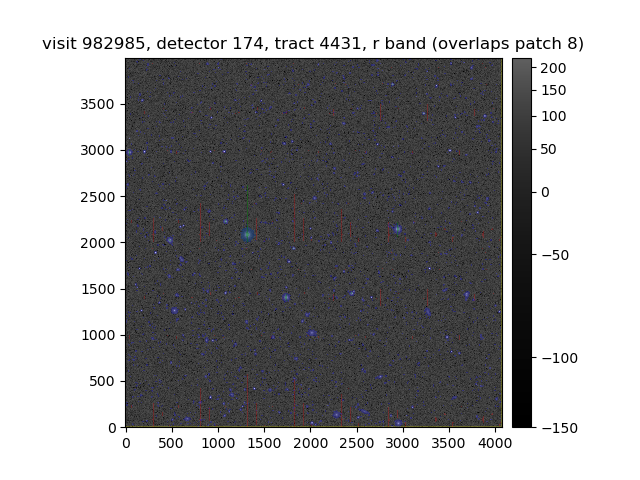

In [137]:
disp = afwDisplay.Display(1, reopenPlot=True)
disp.setImageColormap('gray')
disp.scale('asinh', 'zscale')
disp.mtv(calexp1, title='visit 982985, detector 174, tract 4431, r band (overlaps patch 8)')

<IPython.core.display.Javascript object>


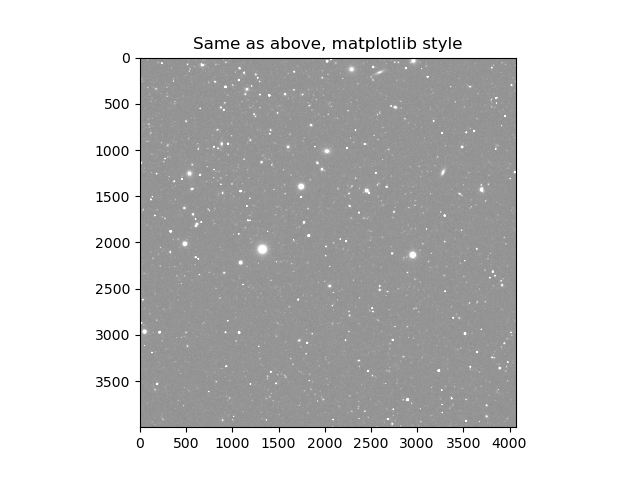

Text(0.5, 1.0, 'Same as above, matplotlib style')

In [139]:
plt.figure()
calexp1Norm = ImageNormalize(calexp1.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(calexp1.image.array, cmap='gray', norm=calexp1Norm)
plt.title("Same as above, matplotlib style")

And now we repeat the process, but zooming in on what looks like a more crowded region

It's probably galaxy-crowded, not star-crowded, but that's the only real option in DC2

In [82]:
coord2 = lsst.geom.SpherePoint(55.76, -32.26, lsst.geom.degrees)
patch2 = tract.findPatch(coord2)
tract.getSequentialPatchIndex(patch2)

17

In [83]:
list(butler.registry.queryDataIds(["tract", "patch", "visit", "detector"],
                                  instrument=instrument, datasets="calexp", collections=collections,
                                  where="visit=982985 AND tract=4431 AND skymap='DC2' AND patch=17"))

[{instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 163, tract: 4431, patch: 17, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 164, tract: 4431, patch: 17, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 133, tract: 4431, patch: 17, visit: 982985, ...},
 {instrument: 'LSSTCam-imSim', skymap: 'DC2', detector: 134, tract: 4431, patch: 17, visit: 982985, ...}]

In [98]:
calexp2 = butler.get('calexp', collections=collections, instrument=instrument, visit=982985, detector=164)

<IPython.core.display.Javascript object>


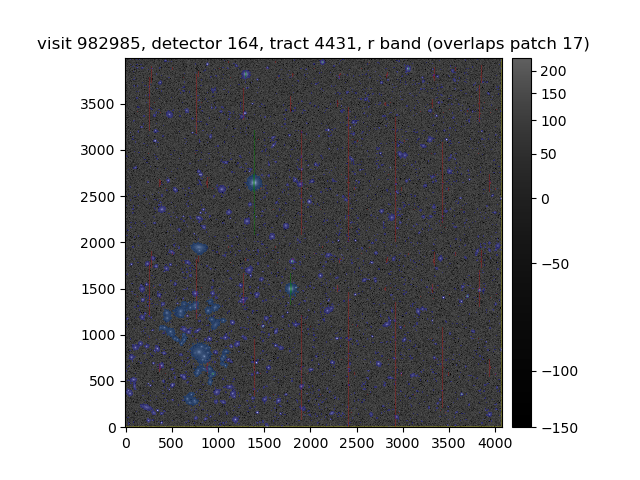

In [136]:
disp = afwDisplay.Display(3, reopenPlot=True)
disp.setImageColormap('gray')
disp.scale('asinh', 'zscale')
disp.mtv(calexp2, title='visit 982985, detector 164, tract 4431, r band (overlaps patch 17)')

<IPython.core.display.Javascript object>


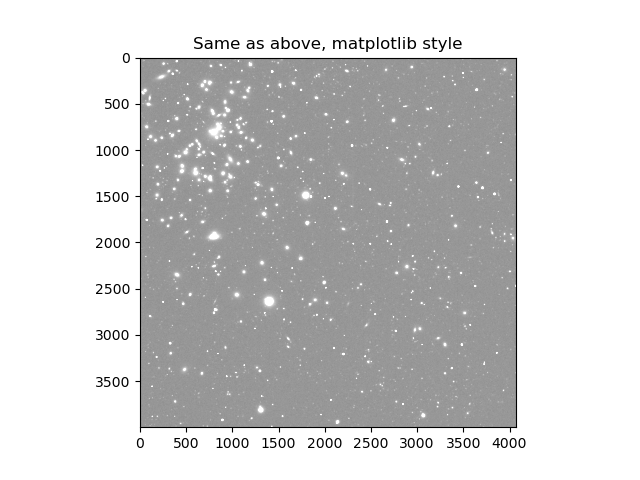

Text(0.5, 1.0, 'Same as above, matplotlib style')

In [140]:
plt.figure()
calexp2Norm = ImageNormalize(calexp2.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(calexp2.image.array, cmap='gray', norm=calexp2Norm)
plt.title("Same as above, matplotlib style")